<a href="https://colab.research.google.com/github/ceharata/DiagnosisofCOVID-19/blob/master/Diagnosis_of_COVID_19_and_its_clinical_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np


drive.mount('/content/drive')
dataset = pd.read_excel("/content/drive/My Drive/Colab Notebooks/COVID-19/data/dataset.xlsx")
dataset_blood = pd.read_excel("/content/drive/My Drive/Colab Notebooks/COVID-19/data/dataset_blood.xlsx")
test = pd.read_excel("/content/drive/My Drive/Colab Notebooks/COVID-19/data/teste_covid.xlsx")
dataset = dataset.replace(np.nan, 0, regex=True)
dataset_blood = dataset.replace(np.nan, 0, regex=True)
test = test.replace(np.nan, 0, regex=True)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,89fbf544d6a3bb6,10.0,negative,0.0,0.0,0.0,2.662704,2.671868,-1.158065,-0.101517,3.028643,0.053965,0.542882,-0.250447,-0.223767,-0.710443,0.007280,-1.055610,-0.666718,0.171035,-0.625200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241373,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c25ff06f215d126,18.0,negative,0.0,1.0,0.0,2.433818,1.606716,-0.542537,-0.101517,3.645706,-1.353327,-2.046149,1.945176,-0.223767,-2.801307,-0.456253,-2.177267,-0.692982,3.267013,1.948981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.691860,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.918997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6628411b99775e9,6.0,negative,0.0,0.0,0.0,2.410930,2.170619,0.462408,-0.213711,1.847410,-0.594242,-0.253742,1.085293,-0.834685,0.282719,-0.709090,0.466636,-0.404086,0.790231,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.937934,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b41882de14f32e3,13.0,negative,0.0,0.0,0.0,2.136267,2.483899,0.675959,1.356995,1.565324,0.540121,1.538664,1.068597,4.663579,1.223607,0.175837,0.546754,0.305020,0.259492,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.799373,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6eb7cb571bdedaf,5.0,negative,0.0,0.0,0.0,2.090489,2.045308,-0.768649,1.469188,1.935561,-0.236022,0.244149,-0.211488,0.081693,-0.030911,-0.245556,-0.174311,2.248498,0.436405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.348656,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data explore

In [5]:
dataset['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

replace values to predict

In [111]:
for n,i in enumerate(dataset['SARS-Cov-2 exam result']):
  if i == 'positive':
     dataset['SARS-Cov-2 exam result'][n] = 1
  else:
    dataset['SARS-Cov-2 exam result'][n] = 0
dataset['SARS-Cov-2 exam result'].value_counts()

for n,i in enumerate(dataset_blood['SARS-Cov-2 exam result']):
  if i == 'positive':
     dataset_blood['SARS-Cov-2 exam result'][n] = 1
  else:
    dataset_blood['SARS-Cov-2 exam result'][n] = 0
dataset_blood['SARS-Cov-2 exam result'].value_counts()

dataset['SARS-Cov-2 exam result'] = dataset['SARS-Cov-2 exam result'].astype('int')
dataset_blood['SARS-Cov-2 exam result'] = dataset_blood['SARS-Cov-2 exam result'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


predict by blood exam with KNeighbors

In [112]:
kviz_age = KNeighborsClassifier(n_neighbors=2)
kviz = KNeighborsClassifier(n_neighbors=2)

kviz.fit(dataset_blood[['Patient age quantile','Hematocrit',	'Hemoglobin',	'Platelets',	'Mean platelet volume ',	'Red blood Cells',	'Lymphocytes',	'Mean corpuscular hemoglobin concentration (MCHC)',	'Leukocytes',	'Basophils',	'Mean corpuscular hemoglobin (MCH)',	'Eosinophils',	'Mean corpuscular volume (MCV)',	'Monocytes',	'Red blood cell distribution width (RDW)',	'Serum Glucose',	'Neutrophils',	'Urea',	'Proteina C reativa mg/dL',	'Creatinine',	'Potassium',	'Sodium',	'Influenza B, rapid test',	'Influenza A, rapid test',	'Alanine transaminase',	'Aspartate transaminase',	'Gamma-glutamyltransferase ',	'Total Bilirubin',	'Direct Bilirubin',	'Indirect Bilirubin',	'Alkaline phosphatase',	'Ionized calcium ',	'Strepto A',	'Magnesium',	'pCO2 (venous blood gas analysis)',	'Hb saturation (venous blood gas analysis)',	'Base excess (venous blood gas analysis)',	'pO2 (venous blood gas analysis)',	'Fio2 (venous blood gas analysis)',	'Total CO2 (venous blood gas analysis)',	'pH (venous blood gas analysis)',	'HCO3 (venous blood gas analysis)',	'Rods #',	'Segmented',	'Promyelocytes',	'Metamyelocytes',	'Myelocytes',	'Myeloblasts',	'Urine - Esterase',	'Urine - pH',	'Urine - Bile pigments',	'Urine - Ketone Bodies',	'Urine - Nitrite',	'Urine - Density',	'Urine - Protein',	'Urine - Sugar',	'Urine - Leukocytes',	'Urine - Red blood cells',	'Urine - Hyaline cylinders',	'Urine - Granular cylinders',	'Urine - Yeasts',	'Partial thromboplastin time (PTT) ',	'Relationship (Patient/Normal)',	'International normalized ratio (INR)',	'Lactic Dehydrogenase',	'Prothrombin time (PT), Activity',	'Vitamin B12',	'Creatine phosphokinase (CPK) ',	'Ferritin',	'Arterial Lactic Acid',	'Lipase dosage',	'D-Dimer',	'Albumin',	'Hb saturation (arterial blood gases)',	'pCO2 (arterial blood gas analysis)',	'Base excess (arterial blood gas analysis)',	'pH (arterial blood gas analysis)',	'Total CO2 (arterial blood gas analysis)',	'HCO3 (arterial blood gas analysis)',	'pO2 (arterial blood gas analysis)',	'Arteiral Fio2',	'Phosphor',	'ctO2 (arterial blood gas analysis)']] , dataset_blood['SARS-Cov-2 exam result'])
kviz_age.fit(dataset[['Patient age quantile']] , dataset_blood['SARS-Cov-2 exam result'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [113]:
kviz.predict(test[['Patient age quantile','Hematocrit',	'Hemoglobin',	'Platelets',	'Mean platelet volume ',	'Red blood Cells',	'Lymphocytes',	'Mean corpuscular hemoglobin concentration (MCHC)',	'Leukocytes',	'Basophils',	'Mean corpuscular hemoglobin (MCH)',	'Eosinophils',	'Mean corpuscular volume (MCV)',	'Monocytes',	'Red blood cell distribution width (RDW)',	'Serum Glucose',	'Neutrophils',	'Urea',	'Proteina C reativa mg/dL',	'Creatinine',	'Potassium',	'Sodium',	'Influenza B, rapid test',	'Influenza A, rapid test',	'Alanine transaminase',	'Aspartate transaminase',	'Gamma-glutamyltransferase ',	'Total Bilirubin',	'Direct Bilirubin',	'Indirect Bilirubin',	'Alkaline phosphatase',	'Ionized calcium ',	'Strepto A',	'Magnesium',	'pCO2 (venous blood gas analysis)',	'Hb saturation (venous blood gas analysis)',	'Base excess (venous blood gas analysis)',	'pO2 (venous blood gas analysis)',	'Fio2 (venous blood gas analysis)',	'Total CO2 (venous blood gas analysis)',	'pH (venous blood gas analysis)',	'HCO3 (venous blood gas analysis)',	'Rods #',	'Segmented',	'Promyelocytes',	'Metamyelocytes',	'Myelocytes',	'Myeloblasts',	'Urine - Esterase',	'Urine - pH',	'Urine - Bile pigments',	'Urine - Ketone Bodies',	'Urine - Nitrite',	'Urine - Density',	'Urine - Protein',	'Urine - Sugar',	'Urine - Leukocytes',	'Urine - Red blood cells',	'Urine - Hyaline cylinders',	'Urine - Granular cylinders',	'Urine - Yeasts',	'Partial thromboplastin time (PTT) ',	'Relationship (Patient/Normal)',	'International normalized ratio (INR)',	'Lactic Dehydrogenase',	'Prothrombin time (PT), Activity',	'Vitamin B12',	'Creatine phosphokinase (CPK) ',	'Ferritin',	'Arterial Lactic Acid',	'Lipase dosage',	'D-Dimer',	'Albumin',	'Hb saturation (arterial blood gases)',	'pCO2 (arterial blood gas analysis)',	'Base excess (arterial blood gas analysis)',	'pH (arterial blood gas analysis)',	'Total CO2 (arterial blood gas analysis)',	'HCO3 (arterial blood gas analysis)',	'pO2 (arterial blood gas analysis)',	'Arteiral Fio2',	'Phosphor',	'ctO2 (arterial blood gas analysis)']])

array([0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
kviz_age.predict(test[['Patient age quantile']])

array([0, 0, 0, 0, 0, 0, 0, 0])

Verification by exam result for decision tree

In [128]:
from sklearn import tree

# o classificador encontra padrões nos dados de treinamento
clf = tree.DecisionTreeClassifier() # instância do classificador
clf = clf.fit(dataset_blood[['Patient age quantile','Hematocrit',	'Hemoglobin',	'Platelets',	'Mean platelet volume ',	'Red blood Cells',	'Lymphocytes',	'Mean corpuscular hemoglobin concentration (MCHC)',	'Leukocytes',	'Basophils',	'Mean corpuscular hemoglobin (MCH)',	'Eosinophils',	'Mean corpuscular volume (MCV)',	'Monocytes',	'Red blood cell distribution width (RDW)',	'Serum Glucose',	'Neutrophils',	'Urea',	'Proteina C reativa mg/dL',	'Creatinine',	'Potassium',	'Sodium',	'Influenza B, rapid test',	'Influenza A, rapid test',	'Alanine transaminase',	'Aspartate transaminase',	'Gamma-glutamyltransferase ',	'Total Bilirubin',	'Direct Bilirubin',	'Indirect Bilirubin',	'Alkaline phosphatase',	'Ionized calcium ',	'Strepto A',	'Magnesium',	'pCO2 (venous blood gas analysis)',	'Hb saturation (venous blood gas analysis)',	'Base excess (venous blood gas analysis)',	'pO2 (venous blood gas analysis)',	'Fio2 (venous blood gas analysis)',	'Total CO2 (venous blood gas analysis)',	'pH (venous blood gas analysis)',	'HCO3 (venous blood gas analysis)',	'Rods #',	'Segmented',	'Promyelocytes',	'Metamyelocytes',	'Myelocytes',	'Myeloblasts',	'Urine - Esterase',	'Urine - pH',	'Urine - Bile pigments',	'Urine - Ketone Bodies',	'Urine - Nitrite',	'Urine - Density',	'Urine - Protein',	'Urine - Sugar',	'Urine - Leukocytes',	'Urine - Red blood cells',	'Urine - Hyaline cylinders',	'Urine - Granular cylinders',	'Urine - Yeasts',	'Partial thromboplastin time (PTT) ',	'Relationship (Patient/Normal)',	'International normalized ratio (INR)',	'Lactic Dehydrogenase',	'Prothrombin time (PT), Activity',	'Vitamin B12',	'Creatine phosphokinase (CPK) ',	'Ferritin',	'Arterial Lactic Acid',	'Lipase dosage',	'D-Dimer',	'Albumin',	'Hb saturation (arterial blood gases)',	'pCO2 (arterial blood gas analysis)',	'Base excess (arterial blood gas analysis)',	'pH (arterial blood gas analysis)',	'Total CO2 (arterial blood gas analysis)',	'HCO3 (arterial blood gas analysis)',	'pO2 (arterial blood gas analysis)',	'Arteiral Fio2',	'Phosphor',	'ctO2 (arterial blood gas analysis)']] , dataset_blood['SARS-Cov-2 exam result']) # fit encontra padrões nos dados
clf.feature_importances_


array([0.03509352, 0.07300474, 0.0241784 , 0.05972362, 0.        ,
       0.06900931, 0.03824897, 0.00917101, 0.31935333, 0.02919196,
       0.        , 0.01796987, 0.00529881, 0.03846661, 0.01397488,
       0.        , 0.00815201, 0.01528502, 0.02908293, 0.02972087,
       0.        , 0.01048116, 0.00998621, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06273142,
       0.01581209, 0.        , 0.        , 0.        , 0.01069951,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01171852, 0.        , 0.01221663, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00917101, 0.        ,
       0.        , 0.        , 0.01196785, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03028

In [129]:
for feature,importancia in zip(dataset_blood.columns,clf.feature_importances_):
  print ("{}:{}".format(feature, importancia))

Patient ID:0.035093521392513566
Patient age quantile:0.07300473687589554
SARS-Cov-2 exam result:0.024178402226651755
Patient addmited to regular ward (1=yes, 0=no):0.059723620279801715
Patient addmited to semi-intensive unit (1=yes, 0=no):0.0
Patient addmited to intensive care unit (1=yes, 0=no):0.06900930867654
Hematocrit:0.038248973374810896
Hemoglobin:0.009171012407840308
Platelets:0.3193533275779314
Mean platelet volume :0.029191963304532952
Red blood Cells:0.0
Lymphocytes:0.017969867790434985
Mean corpuscular hemoglobin concentration (MCHC):0.005298807168974403
Leukocytes:0.03846660969725607
Basophils:0.013974876050042372
Mean corpuscular hemoglobin (MCH):0.0
Eosinophils:0.008152011029191384
Mean corpuscular volume (MCV):0.015285020679733845
Monocytes:0.029082931558919726
Red blood cell distribution width (RDW):0.02972087354392692
Serum Glucose:0.0
Respiratory Syncytial Virus:0.010481157037531783
Influenza A:0.009986213510759442
Influenza B:0.0
Parainfluenza 1:0.0
CoronavirusNL63:

In [135]:
resultado = clf.predict(test[['Patient age quantile','Hematocrit',	'Hemoglobin',	'Platelets',	'Mean platelet volume ',	'Red blood Cells',	'Lymphocytes',	'Mean corpuscular hemoglobin concentration (MCHC)',	'Leukocytes',	'Basophils',	'Mean corpuscular hemoglobin (MCH)',	'Eosinophils',	'Mean corpuscular volume (MCV)',	'Monocytes',	'Red blood cell distribution width (RDW)',	'Serum Glucose',	'Neutrophils',	'Urea',	'Proteina C reativa mg/dL',	'Creatinine',	'Potassium',	'Sodium',	'Influenza B, rapid test',	'Influenza A, rapid test',	'Alanine transaminase',	'Aspartate transaminase',	'Gamma-glutamyltransferase ',	'Total Bilirubin',	'Direct Bilirubin',	'Indirect Bilirubin',	'Alkaline phosphatase',	'Ionized calcium ',	'Strepto A',	'Magnesium',	'pCO2 (venous blood gas analysis)',	'Hb saturation (venous blood gas analysis)',	'Base excess (venous blood gas analysis)',	'pO2 (venous blood gas analysis)',	'Fio2 (venous blood gas analysis)',	'Total CO2 (venous blood gas analysis)',	'pH (venous blood gas analysis)',	'HCO3 (venous blood gas analysis)',	'Rods #',	'Segmented',	'Promyelocytes',	'Metamyelocytes',	'Myelocytes',	'Myeloblasts',	'Urine - Esterase',	'Urine - pH',	'Urine - Bile pigments',	'Urine - Ketone Bodies',	'Urine - Nitrite',	'Urine - Density',	'Urine - Protein',	'Urine - Sugar',	'Urine - Leukocytes',	'Urine - Red blood cells',	'Urine - Hyaline cylinders',	'Urine - Granular cylinders',	'Urine - Yeasts',	'Partial thromboplastin time (PTT) ',	'Relationship (Patient/Normal)',	'International normalized ratio (INR)',	'Lactic Dehydrogenase',	'Prothrombin time (PT), Activity',	'Vitamin B12',	'Creatine phosphokinase (CPK) ',	'Ferritin',	'Arterial Lactic Acid',	'Lipase dosage',	'D-Dimer',	'Albumin',	'Hb saturation (arterial blood gases)',	'pCO2 (arterial blood gas analysis)',	'Base excess (arterial blood gas analysis)',	'pH (arterial blood gas analysis)',	'Total CO2 (arterial blood gas analysis)',	'HCO3 (arterial blood gas analysis)',	'pO2 (arterial blood gas analysis)',	'Arteiral Fio2',	'Phosphor',	'ctO2 (arterial blood gas analysis)']])
print(resultado)

[1 0 0 0 0 0 0 0]


In [145]:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot

In [0]:
import graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier, export_graphviz

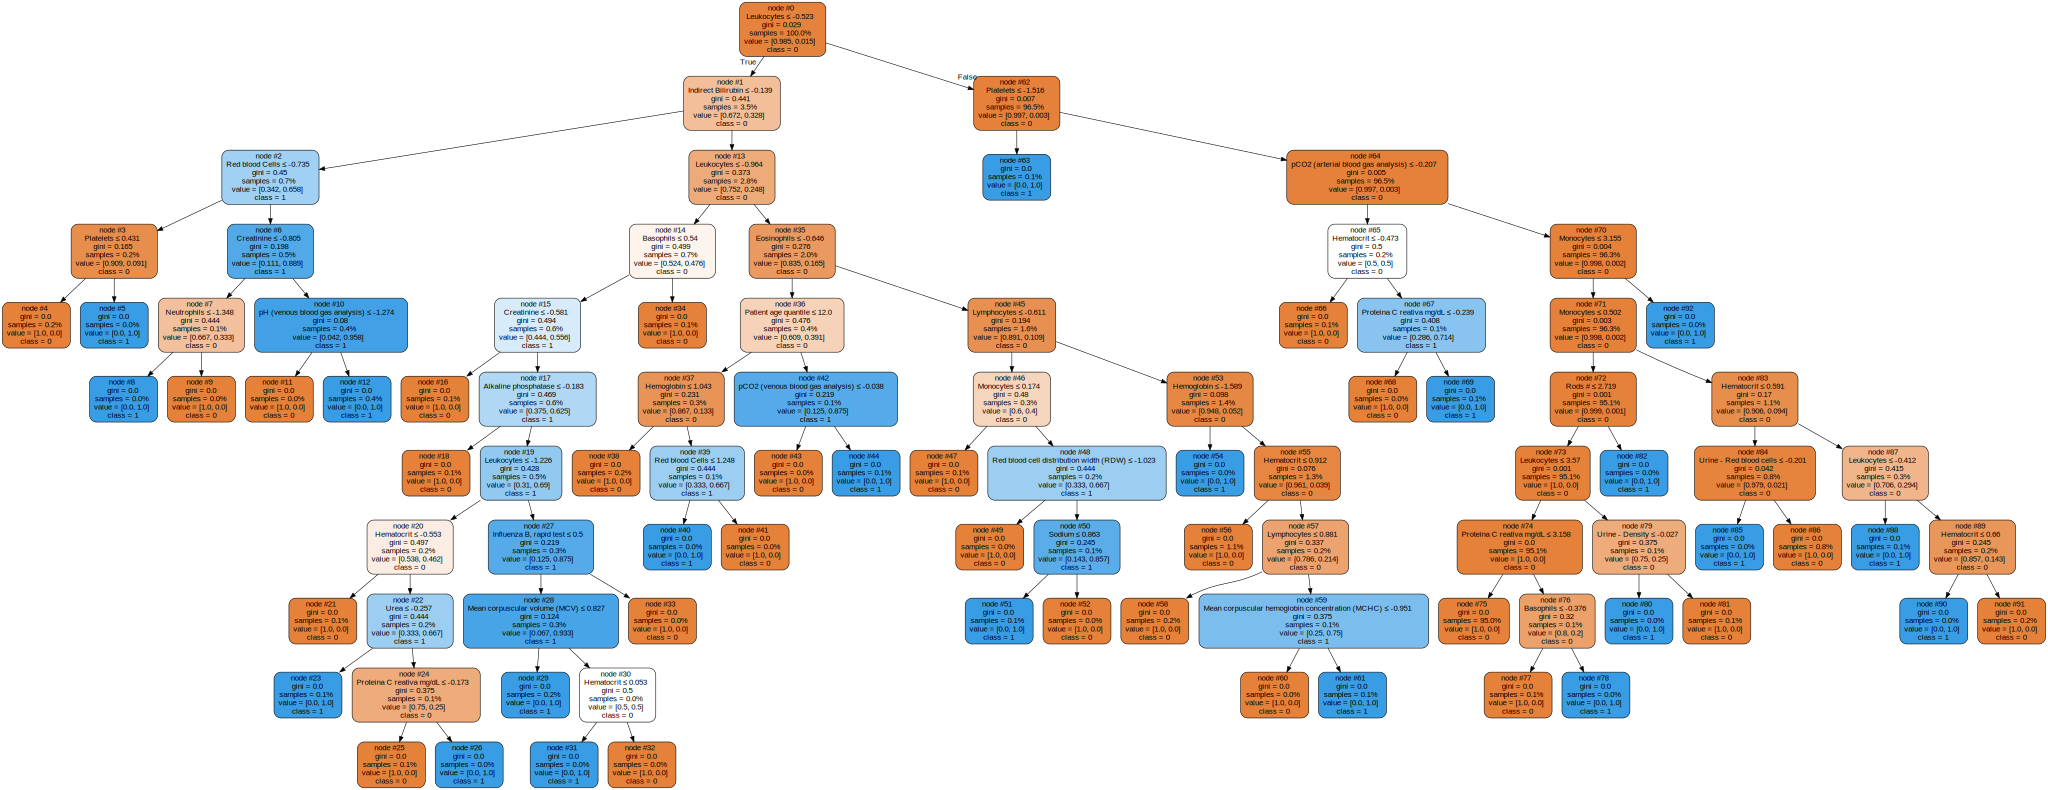

In [150]:
dot_data = export_graphviz(
    clf,
    out_file = None,
    feature_names = ['Patient age quantile','Hematocrit',	'Hemoglobin',	'Platelets',	'Mean platelet volume ',	'Red blood Cells',	'Lymphocytes',	'Mean corpuscular hemoglobin concentration (MCHC)',	'Leukocytes',	'Basophils',	'Mean corpuscular hemoglobin (MCH)',	'Eosinophils',	'Mean corpuscular volume (MCV)',	'Monocytes',	'Red blood cell distribution width (RDW)',	'Serum Glucose',	'Neutrophils',	'Urea',	'Proteina C reativa mg/dL',	'Creatinine',	'Potassium',	'Sodium',	'Influenza B, rapid test',	'Influenza A, rapid test',	'Alanine transaminase',	'Aspartate transaminase',	'Gamma-glutamyltransferase ',	'Total Bilirubin',	'Direct Bilirubin',	'Indirect Bilirubin',	'Alkaline phosphatase',	'Ionized calcium ',	'Strepto A',	'Magnesium',	'pCO2 (venous blood gas analysis)',	'Hb saturation (venous blood gas analysis)',	'Base excess (venous blood gas analysis)',	'pO2 (venous blood gas analysis)',	'Fio2 (venous blood gas analysis)',	'Total CO2 (venous blood gas analysis)',	'pH (venous blood gas analysis)',	'HCO3 (venous blood gas analysis)',	'Rods #',	'Segmented',	'Promyelocytes',	'Metamyelocytes',	'Myelocytes',	'Myeloblasts',	'Urine - Esterase',	'Urine - pH',	'Urine - Bile pigments',	'Urine - Ketone Bodies',	'Urine - Nitrite',	'Urine - Density',	'Urine - Protein',	'Urine - Sugar',	'Urine - Leukocytes',	'Urine - Red blood cells',	'Urine - Hyaline cylinders',	'Urine - Granular cylinders',	'Urine - Yeasts',	'Partial thromboplastin time (PTT) ',	'Relationship (Patient/Normal)',	'International normalized ratio (INR)',	'Lactic Dehydrogenase',	'Prothrombin time (PT), Activity',	'Vitamin B12',	'Creatine phosphokinase (CPK) ',	'Ferritin',	'Arterial Lactic Acid',	'Lipase dosage',	'D-Dimer',	'Albumin',	'Hb saturation (arterial blood gases)',	'pCO2 (arterial blood gas analysis)',	'Base excess (arterial blood gas analysis)',	'pH (arterial blood gas analysis)',	'Total CO2 (arterial blood gas analysis)',	'HCO3 (arterial blood gas analysis)',	'pO2 (arterial blood gas analysis)',	'Arteiral Fio2',	'Phosphor',	'ctO2 (arterial blood gas analysis)'],
    class_names = ['0','1'],
    filled = True, rounded = True,
    proportion = True,
    node_ids = True,
    rotate = False,
    label = 'all',
    special_characters = True
)

graph = graphviz.Source(dot_data)
graph

Conclusão<br>
Observando a arvore  de decisão, é possível observar que o primeiro parâmetro para identificar positivo para Sars-Covid-19 é o Leucócitos.<br>
A classificação por arvore de decisão foi mais preciso